# EM Complete Test 7

In [1]:
import numpy as np
import matplotlib.pylab as plt

import os
import sys
sys.path.append('../src/')
from simulate_gillespie import *
from estimate_total_rates import *

## Setup

In [11]:
## --- Setup --- ##
test_name = "test_1_em"

g_type = "complete"

# TODO: increase these values
N = 100
g = CompleteHypergraph(N)

I0 = 10

nsims = 100
run_gillespie_simulations = True

time_max = 10

# TODO: select betas
beta1 = 2.4 / N       # pairwise infection rate
beta2 = 4.4 / (N**2)  # hyperedge contagion rate
mu    = 1.0           # recovery rate

print(f"{test_name}: \n")
print(f"\t H = Complete Hypergraph, N = {N}, I0 = {I0}, time_max = {time_max},")
print(f"\t beta1 * N = {beta1 * N}, beta2 * N^2 = {beta2 * (N**2)}, mu = {mu},")
print(f"\t with estimation based on {nsims} Gillespie simulation runs\n")

test_1_em: 

	 H = Complete Hypergraph, N = 100, I0 = 10, time_max = 10,
	 beta1 * N = 2.4, beta2 * N^2 = 4.4, mu = 1.0,
	 with estimation based on 100 Gillespie simulation runs



In [12]:
## --- Run Gillespie ---
# I0_gillespie = I0 # TODO: go over the range when necessary
# initial_infections = list(range(I0_gillespie))
if run_gillespie_simulations: 
    X_sims = []
    for _ in range(nsims):
        # X_t = gillespie_sim(g, beta1, beta2, mu, initial_infections, time_max)
        X_t = gillespie_sim_complete(N, beta1, beta2, mu, I0, time_max)
        X_sims.append(X_t)

    # save the simulation results
    sim_results = {f'sim_{i}': X_sims[i] for i in range(nsims)}
    np.savez_compressed(f'../results/gillespie-sims_{test_name}.npz', **sim_results)
else: 
    # load simulation results
    sim_results = np.load(f'../results/gillespie-sims_{test_name}.npz', allow_pickle=True)
    X_sims = [sim_results[f'sim_{i}'] for i in range(nsims)]

break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= t

In [20]:
# discretize
t_obs_start = 0.0           # start observation time
t_obs_end = time_max        # end observation time
num_intervals = 100          # number of intervals between observations: 21 points

Y_sequence_all = []
for i, X_t in enumerate(X_sims):
    # extract times and states
    if X_t.shape[0] < 3:
         # skip empty
         continue
    times_run = X_t[0, :].astype(float)
    states_run = X_t[2, :].astype(int)
    Y_sequence_run = discretize_sequence((times_run, states_run), t_obs_start, t_obs_end, num_intervals)
    Y_sequence_all.extend(Y_sequence_run)
    
for i in range(min(5, len(Y_sequence_all))):
    print(f"interval {i}: state {Y_sequence_all[i][0]} - {Y_sequence_all[i][1]} (dt={Y_sequence_all[i][2]})")

interval 0: state 10 - 11 (dt=0.1)
interval 1: state 11 - 13 (dt=0.1)
interval 2: state 13 - 18 (dt=0.1)
interval 3: state 18 - 20 (dt=0.1)
interval 4: state 20 - 22 (dt=0.1)


plot saved to ../figures/estimation/complete/test_1_em/gillespie_discrete_N=100_I0=10_npts=101.pdf


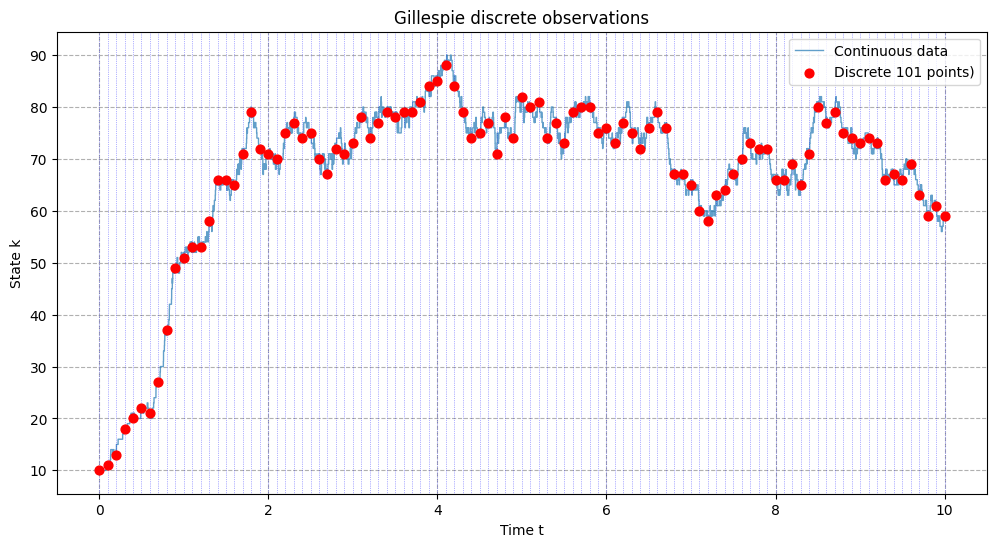

In [21]:
# plot just one example run with discrete points
def plot_discretized_sequence(X_times, X_states, Y_obs_sequence, t_obs_start, t_obs_end, num_intervals):
    plt.figure(figsize=(12, 6))
    plt.step(X_times, X_states, where='post', label='Continuous data', alpha=0.7, linewidth=1.0)

    observation_times = np.linspace(t_obs_start, t_obs_end, num_intervals + 1)
    observed_states_at_times = [Y_obs_sequence[0][0]]
    observed_states_at_times.extend([interval[1] for interval in Y_obs_sequence])

    plt.scatter(observation_times, observed_states_at_times,
                color='red', marker='o', s=40, zorder=5,
                label=f'Discrete {num_intervals + 1} points)')

    for t_obs in observation_times:
        plt.axvline(t_obs, color='blue', linestyle=':', linewidth=0.5, alpha=0.6)

    plt.xlabel("Time t")
    plt.ylabel("State k")
    plt.title("Gillespie discrete observations")
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.xlim(left=min(X_times[0], t_obs_start - (t_obs_end-t_obs_start)*0.05 ))
    
    min_state, max_state = np.min(X_states), np.max(X_states)
    plt.ylim(bottom=min_state - max(1, max_state*0.05), top=max_state + max(1, max_state*0.05))
    
    filename = f"../figures/estimation/complete/{test_name}/gillespie_discrete_N={N}_I0={I0}_npts={num_intervals + 1}.pdf"
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    print(f"plot saved to {filename}")
    plt.show()

plot_run_index = 0

X_t_plot = X_sims[plot_run_index]
times_plot = X_t_plot[0, :].astype(float)
states_plot = X_t_plot[2, :].astype(int)

Y_sequence_plot = discretize_sequence((times_plot, states_plot), t_obs_start, t_obs_end, num_intervals)
plot_discretized_sequence(times_plot, states_plot, Y_sequence_plot, t_obs_start, t_obs_end, num_intervals)

## Estimate

In [22]:
dt = Y_sequence_all[0][2] # interval duration / step size 
num_intervals = len(Y_sequence_all)

# assuming observations start at 0
t_obs_start = 0.0
t_obs_end = num_intervals * dt

# extract time points and observed states
t_data_bd = np.linspace(t_obs_start, t_obs_end, num_intervals + 1).tolist()
p_data_bd = [Y_sequence_all[0][0]]
p_data_bd.extend([interval[1] for interval in Y_sequence_all])

len(Y_sequence_all)

10000

In [23]:
# TODO: set initial guess \theta^{(0)}

# beta1_guess = beta1
# beta2_guess = beta2

# beta1_guess = beta1 * 0.8
# beta2_guess = beta2 * 1.2

beta1_guess = 1
beta2_guess = 1

p0_guess = [beta1_guess, beta2_guess]

# TODO: set reasonable bounds, these are quite high now
max_beta1 = 10.0
max_beta2 = 50.0
p_bounds = [[1e-9, max_beta1], [1e-9, max_beta2]]

In [24]:
es1 = estimate_em(t_data_bd, p_data_bd, p0_guess, p_bounds)

Iteration  1  estimate is:  [2.00299778 1.52557165]
Iteration  2  estimate is:  [2.40176469 4.18816449]
Iteration  3  estimate is:  [2.01054659 5.48002028]
Iteration  4  estimate is:  [2.0258913  5.43578577]
Iteration  5  estimate is:  [2.01149861 5.48297274]
Iteration  6  estimate is:  [2.01149861 5.48297273]
Estimated parameters [beta1, beta2]: [np.float64(2.0114986060546984), np.float64(5.482972732680559)]
Standard errors: [np.float64(0.08564517440004231), np.float64(0.31417838133488385)]
Log-likelihood: -18577.685300730463
Compute time: 352 seconds


```python
Iteration  1  estimate is:  [2.05547366 1.26899002]
Iteration  2  estimate is:  [2.46428386 3.84453115]
Iteration  3  estimate is:  [2.07169864 5.1381188 ]
Iteration  4  estimate is:  [2.08756784 5.09246598]
Iteration  5  estimate is:  [2.073425   5.13874689]
Iteration  6  estimate is:  [2.073425   5.13874689]
Estimated parameters [beta1, beta2]: [np.float64(2.0734250032402315), np.float64(5.138746893768927)]
Standard errors: [np.float64(0.08660786945119504), np.float64(0.3172934243703429)]
Log-likelihood: -18274.807833017378
Compute time: 231 seconds
```

In [9]:
es2 = estimate_em_2(t_data_bd, p_data_bd, p0_guess, p_bounds)

Estimated parameters [beta1, beta2]: [np.float64(1.994547326039253), np.float64(5.468646774496944)]
Standard errors: [np.float64(0.08378412047865419), np.float64(0.3074348361036978)]
Log-likelihood: -17942.03135858234
Compute time: 1 seconds


In [10]:
es3 = estimate_em_3(t_data_bd, p_data_bd, p0_guess, p_bounds)

Estimated parameters [beta1, beta2]: [np.float64(1.9945635999973168), np.float64(5.468583457183419)]
Standard errors: [np.float64(0.08375327569876613), np.float64(0.3072904389480444)]
Log-likelihood: -17942.03135855227
Compute time: 1 seconds


```python
Iteration  1  estimate is:  [1.93711788 1.67919204]
Iteration  2  estimate is:  [2.31347288 4.41573484]
Iteration  3  estimate is:  [1.92560569 5.6796922 ]
Iteration  4  estimate is:  [1.93949244 5.63982144]
Iteration  5  estimate is:  [1.92627635 5.68257965]
Iteration  6  estimate is:  [1.92627635 5.68257965]

Estimated parameters [beta1, beta2]: [np.float64(1.9262763481497507), np.float64(5.68257965477159)]
Standard errors: [np.float64(0.08658452783852015), np.float64(0.31290849885936745)]
Log-Likelihood: -18415.500741475153
Compute time:: 215 seconds
```